In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()



# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.summary()

model.compile(loss='MSE',
              optimizer='SGD',
              metrics=['mae','mse'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras import models, layers, utils, optimizers

utils.plot_model(model)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=32,
                    validation_data=(test_data, test_labels))
                    

Epoch 1/200
13/13 [==============================] - 1s 37ms/step - loss: 375.6526 - mae: 16.5326 - mse: 375.6526 - val_loss: 147.8424 - val_mae: 9.2303 - val_mse: 147.8424
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 141.1312 - mae: 8.9994 - mse: 141.1312 - val_loss: 33.0034 - val_mae: 4.3569 - val_mse: 33.0034
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 142.2254 - mae: 9.3996 - mse: 142.2254 - val_loss: 110.5138 - val_mae: 8.1551 - val_mse: 110.5138
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 41.5693 - mae: 4.4301 - mse: 41.5693 - val_loss: 46.7979 - val_mae: 4.7411 - val_mse: 46.7979
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 33.2422 - mae: 4.1383 - mse: 33.2422 - val_loss: 22.0002 - val_mae: 3.0153 - val_mse: 22.0002
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 17.5039 - mae: 2.9095 - mse: 17.5039 - val_loss: 44.6096 - val_mae: 4.5646 - val

13/13 [==============================] - 0s 7ms/step - loss: 6.1992 - mae: 1.8243 - mse: 6.1992 - val_loss: 20.1102 - val_mae: 2.8429 - val_mse: 20.1102
Epoch 51/200
13/13 [==============================] - 0s 8ms/step - loss: 4.7647 - mae: 1.5765 - mse: 4.7647 - val_loss: 15.7355 - val_mae: 2.5187 - val_mse: 15.7355
Epoch 52/200
13/13 [==============================] - 0s 7ms/step - loss: 4.3359 - mae: 1.5484 - mse: 4.3359 - val_loss: 16.4907 - val_mae: 2.7376 - val_mse: 16.4907
Epoch 53/200
13/13 [==============================] - 0s 7ms/step - loss: 3.6732 - mae: 1.4470 - mse: 3.6732 - val_loss: 15.1261 - val_mae: 2.5147 - val_mse: 15.1261
Epoch 54/200
13/13 [==============================] - 0s 7ms/step - loss: 4.0180 - mae: 1.4955 - mse: 4.0180 - val_loss: 13.2670 - val_mae: 2.2949 - val_mse: 13.2670
Epoch 55/200
13/13 [==============================] - 0s 7ms/step - loss: 4.2548 - mae: 1.5406 - mse: 4.2548 - val_loss: 15.7683 - val_mae: 2.4775 - val_mse: 15.7683
Epoch 56/200
13/1

13/13 [==============================] - 0s 7ms/step - loss: 2.7922 - mae: 1.2128 - mse: 2.7922 - val_loss: 12.5633 - val_mae: 2.4721 - val_mse: 12.5633
Epoch 100/200
13/13 [==============================] - 0s 6ms/step - loss: 3.4781 - mae: 1.3158 - mse: 3.4781 - val_loss: 13.8432 - val_mae: 2.4983 - val_mse: 13.8432
Epoch 101/200
13/13 [==============================] - 0s 6ms/step - loss: 5.0942 - mae: 1.5822 - mse: 5.0942 - val_loss: 15.1467 - val_mae: 2.5672 - val_mse: 15.1467
Epoch 102/200
13/13 [==============================] - 0s 6ms/step - loss: 3.9538 - mae: 1.4682 - mse: 3.9538 - val_loss: 21.5763 - val_mae: 3.1814 - val_mse: 21.5763
Epoch 103/200
13/13 [==============================] - 0s 5ms/step - loss: 3.8342 - mae: 1.4318 - mse: 3.8342 - val_loss: 12.9468 - val_mae: 2.2905 - val_mse: 12.9468
Epoch 104/200
13/13 [==============================] - 0s 5ms/step - loss: 2.7141 - mae: 1.2274 - mse: 2.7141 - val_loss: 13.2370 - val_mae: 2.6243 - val_mse: 13.2370
Epoch 105/20

13/13 [==============================] - 0s 7ms/step - loss: 1.7575 - mae: 0.9838 - mse: 1.7575 - val_loss: 11.5961 - val_mae: 2.3880 - val_mse: 11.5961
Epoch 149/200
13/13 [==============================] - 0s 7ms/step - loss: 2.0921 - mae: 1.0783 - mse: 2.0921 - val_loss: 11.2752 - val_mae: 2.2209 - val_mse: 11.2752
Epoch 150/200
13/13 [==============================] - 0s 7ms/step - loss: 1.9621 - mae: 1.0487 - mse: 1.9621 - val_loss: 12.7777 - val_mae: 2.4192 - val_mse: 12.7777
Epoch 151/200
13/13 [==============================] - 0s 6ms/step - loss: 2.4731 - mae: 1.1921 - mse: 2.4731 - val_loss: 23.2413 - val_mae: 3.5121 - val_mse: 23.2413
Epoch 152/200
13/13 [==============================] - 0s 6ms/step - loss: 4.5830 - mae: 1.5290 - mse: 4.5830 - val_loss: 16.9869 - val_mae: 3.0820 - val_mse: 16.9869
Epoch 153/200
13/13 [==============================] - 0s 6ms/step - loss: 4.5239 - mae: 1.4898 - mse: 4.5239 - val_loss: 12.8660 - val_mae: 2.4898 - val_mse: 12.8660
Epoch 154/20

13/13 [==============================] - 0s 7ms/step - loss: 2.5452 - mae: 1.1866 - mse: 2.5452 - val_loss: 11.7612 - val_mae: 2.3548 - val_mse: 11.7612
Epoch 198/200
13/13 [==============================] - 0s 7ms/step - loss: 1.4109 - mae: 0.8782 - mse: 1.4109 - val_loss: 11.1347 - val_mae: 2.2677 - val_mse: 11.1347
Epoch 199/200
13/13 [==============================] - 0s 7ms/step - loss: 1.7152 - mae: 0.9906 - mse: 1.7152 - val_loss: 10.8207 - val_mae: 2.2012 - val_mse: 10.8207
Epoch 200/200
13/13 [==============================] - 0s 7ms/step - loss: 1.2900 - mae: 0.8104 - mse: 1.2900 - val_loss: 11.4749 - val_mae: 2.2564 - val_mse: 11.4749


In [7]:
history.history

{'loss': [375.652587890625,
  141.13116455078125,
  142.22535705566406,
  41.569332122802734,
  33.242210388183594,
  17.503896713256836,
  24.746246337890625,
  10.898058891296387,
  23.76380729675293,
  26.522571563720703,
  28.72476577758789,
  17.14621353149414,
  12.474859237670898,
  10.701773643493652,
  21.502883911132812,
  17.8453426361084,
  13.723567962646484,
  14.22739315032959,
  10.271653175354004,
  7.636817932128906,
  7.4197235107421875,
  8.459543228149414,
  13.561121940612793,
  7.125312805175781,
  6.7601704597473145,
  6.658639430999756,
  8.271401405334473,
  9.702359199523926,
  8.607145309448242,
  5.868946075439453,
  5.125432014465332,
  13.299912452697754,
  5.295312404632568,
  5.764593601226807,
  5.848088264465332,
  4.695037364959717,
  5.084693908691406,
  5.8118791580200195,
  5.630763053894043,
  5.78644323348999,
  5.392005443572998,
  4.857117176055908,
  5.02968692779541,
  8.542131423950195,
  6.712608814239502,
  5.850689888000488,
  4.65730619

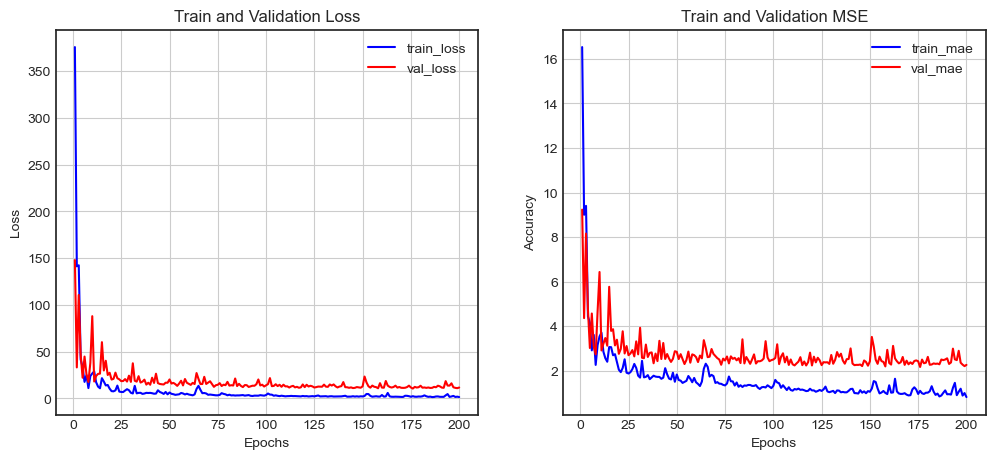

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(train_data, train_labels)

13/13 [==============================] - 0s 3ms/step - loss: 1.2984 - mae: 0.8686 - mse: 1.2984


[1.2983945608139038, 0.8686304092407227, 1.2983945608139038]

# 회고 
 * 딥러닝 모델 평가를 해보았다.
 여러가지 막혔던 부분들이 있는데, 하나씩하나씩 해보고 나니, 질문도 해보고나니  알게되었다. 테스트 데이터와 검증데이터를 확실히 알고 해봐야 할것 같다. 여러 활성화 함수를 넣어봤는데, 각각 기능이 달랐던걸 알게되었다. 좀 더 공부와, 여러가지들을 해봐야 실력이 늘 것 같다. 